#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('Pokemon.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [3]:
dataFrame.describe().transpose().applymap(lambda x: format(x, '.3f'))

,count,mean,std,min,25%,50%,75%,max
#,800.000,362.814,208.344,1.000,184.750,364.500,539.250,721.000
Total,800.000,435.103,119.963,180.000,330.000,450.000,515.000,780.000
HP,800.000,69.259,25.535,1.000,50.000,65.000,80.000,255.000
Attack,800.000,79.001,32.457,5.000,55.000,75.000,100.000,190.000
Defense,800.000,73.843,31.184,5.000,50.000,70.000,90.000,230.000
Sp. Atk,800.000,72.820,32.722,10.000,49.750,65.000,95.000,194.000
Sp. Def,800.000,71.903,27.829,20.000,50.000,70.000,90.000,230.000
Speed,800.000,68.278,29.060,5.000,45.000,65.000,90.000,180.000
Generation,800.000,3.324,1.661,1.000,2.000,3.000,5.000,6.000


In [4]:
dataFrame

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


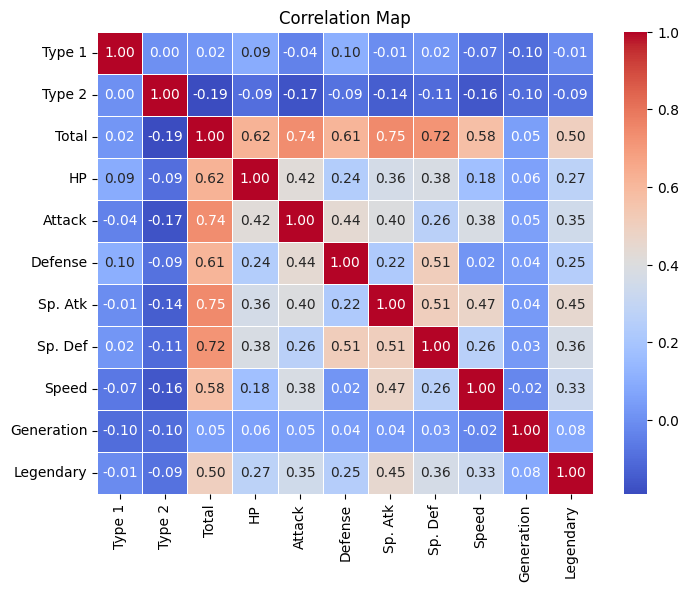

In [5]:
columns_to_include = dataFrame.drop(columns=['Name', '#']).columns
non_numeric_columns = ['Type 1', 'Type 2']

# Convert non numeric columns
label_encoder = LabelEncoder()
dataFrame[non_numeric_columns] = dataFrame[non_numeric_columns].apply(lambda col: label_encoder.fit_transform(col))

# Calculate the correlation matrix
correlation_matrix = dataFrame[columns_to_include].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

#### Create a temporary subset using these 2 columns.

In [6]:
subset = dataFrame[['Attack', 'HP', 'Total']]

In [7]:
# Initialize the outlier detection algorithms
iso_forest = IsolationForest(random_state=42)
oc_svm = OneClassSVM()
ee = EllipticEnvelope()
lof = LocalOutlierFactor()

# Fit the algorithms to the subset
iso_forest.fit(subset[['Attack', 'HP']])
oc_svm.fit(subset[['Attack', 'HP']])
ee.fit(subset[['Attack', 'HP']])
lof.fit(subset[['Attack', 'HP']])

# Predict outliers
iso_forest_outliers = iso_forest.predict(subset[['Attack', 'HP']]) == -1
oc_svm_outliers = oc_svm.predict(subset[['Attack', 'HP']]) == -1
ee_outliers = ee.predict(subset[['Attack', 'HP']]) == -1
lof_outliers = lof.fit_predict(subset[['Attack', 'HP']]) == -1

#### Scatter plots with the different colors for normal samples and outliers for each algorithm.

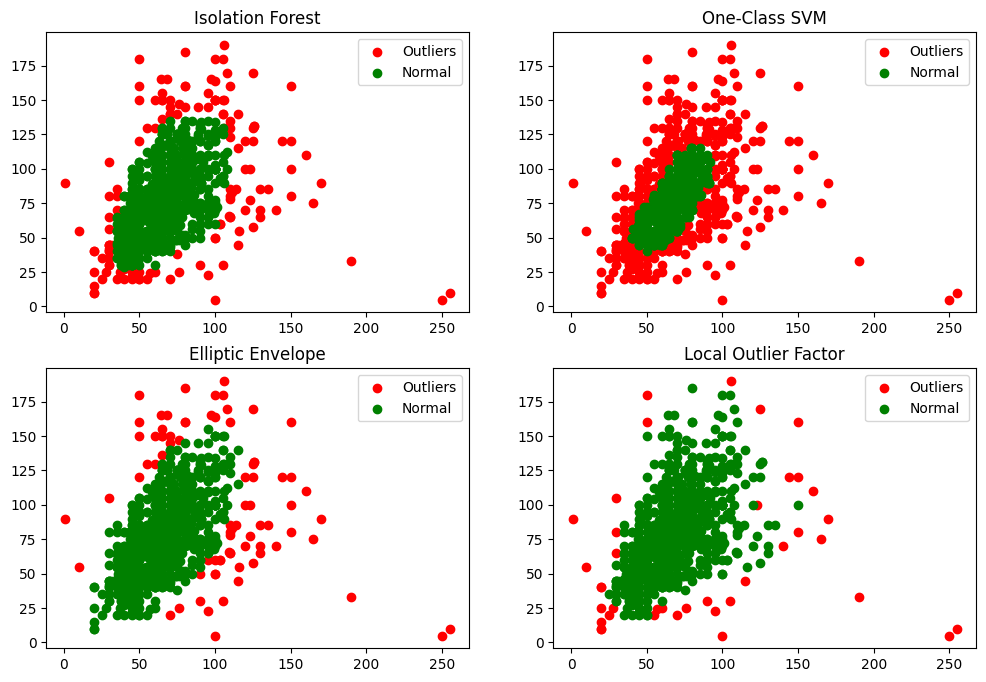

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(subset['HP'][iso_forest_outliers], subset['Attack'][iso_forest_outliers], color='r', label='Outliers')
axes[0, 0].scatter(subset['HP'][~iso_forest_outliers], subset['Attack'][~iso_forest_outliers], color='g', label='Normal')
axes[0, 0].set_title('Isolation Forest')
axes[0, 0].legend()

axes[0, 1].scatter(subset['HP'][oc_svm_outliers], subset['Attack'][oc_svm_outliers], color='r', label='Outliers')
axes[0, 1].scatter(subset['HP'][~oc_svm_outliers], subset['Attack'][~oc_svm_outliers], color='g', label='Normal')
axes[0, 1].set_title('One-Class SVM')
axes[0, 1].legend()

axes[1, 0].scatter(subset['HP'][ee_outliers], subset['Attack'][ee_outliers], color='r', label='Outliers')
axes[1, 0].scatter(subset['HP'][~ee_outliers], subset['Attack'][~ee_outliers], color='g', label='Normal')
axes[1, 0].set_title('Elliptic Envelope')
axes[1, 0].legend()

axes[1, 1].scatter(subset['HP'][lof_outliers], subset['Attack'][lof_outliers], color='r', label='Outliers')
axes[1, 1].scatter(subset['HP'][~lof_outliers], subset['Attack'][~lof_outliers], color='g', label='Normal')
axes[1, 1].set_title('Local Outlier Factor')
axes[1, 1].legend()

plt.show()

In [9]:
# Define a range of contamination values
contamination_values = np.arange(0.01, 0.21, 0.02)

# Initialize lists to store the number of outliers for each algorithm
iso_forest_outliers_counts = []
oc_svm_outliers_counts = []
ee_outliers_counts = []
lof_outliers_counts = []

# Loop over the contamination values
for contamination in contamination_values:
    # Initialize the algorithms with the specified contamination
    iso_forest = IsolationForest(random_state=42, contamination=contamination)
    oc_svm = OneClassSVM(nu=contamination)
    ee = EllipticEnvelope(contamination=contamination)
    lof = LocalOutlierFactor(contamination=contamination)
    
    # Fit the algorithms to the data (excluding the 'Total' column)
    iso_forest.fit(dataFrame[columns_to_include].drop('Total', axis=1))
    oc_svm.fit(dataFrame[columns_to_include].drop('Total', axis=1))
    ee.fit(dataFrame[columns_to_include].drop('Total', axis=1))
    lof.fit(dataFrame[columns_to_include].drop('Total', axis=1))
    
    # Predict outliers
    iso_forest_outliers = iso_forest.predict(dataFrame[columns_to_include].drop('Total', axis=1)) == -1
    oc_svm_outliers = oc_svm.predict(dataFrame[columns_to_include].drop('Total', axis=1)) == -1
    ee_outliers = ee.predict(dataFrame[columns_to_include].drop('Total', axis=1)) == -1
    lof_outliers = lof.fit_predict(dataFrame[columns_to_include].drop('Total', axis=1)) == -1
    
    # Count the number of outliers for each algorithm
    iso_forest_outliers_counts.append(np.sum(iso_forest_outliers))
    oc_svm_outliers_counts.append(np.sum(oc_svm_outliers))
    ee_outliers_counts.append(np.sum(ee_outliers))
    lof_outliers_counts.append(np.sum(lof_outliers))

#### Create for each algorithm the line plot showing the dependence of the number of outliers and the contamination value

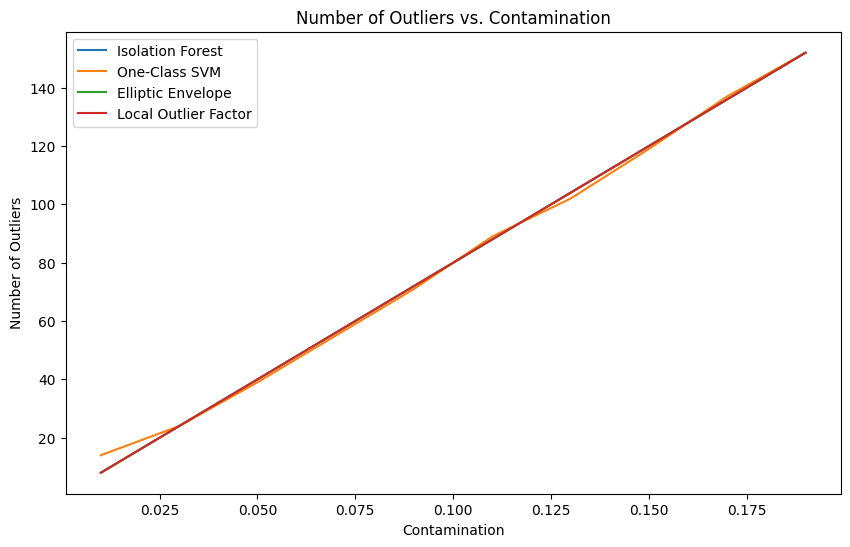

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(contamination_values, iso_forest_outliers_counts, label='Isolation Forest')
plt.plot(contamination_values, oc_svm_outliers_counts, label='One-Class SVM')
plt.plot(contamination_values, ee_outliers_counts, label='Elliptic Envelope')
plt.plot(contamination_values, lof_outliers_counts, label='Local Outlier Factor')
plt.xlabel('Contamination')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers vs. Contamination')
plt.legend()
plt.show()

In [11]:
# Split into features and target
X = dataFrame[columns_to_include].drop('Total', axis=1)
y = dataFrame['Total']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Initialize the algorithms with default settings
iso_forest = IsolationForest(random_state=42)
oc_svm = OneClassSVM()
ee = EllipticEnvelope()
lof = LocalOutlierFactor()

# Fit the algorithms to the training data
iso_forest.fit(X_train)
oc_svm.fit(X_train)
ee.fit(X_train)
lof.fit(X_train)

# Predict outliers on the training data
iso_forest_outliers = iso_forest.predict(X_train) == -1
oc_svm_outliers = oc_svm.predict(X_train) == -1
ee_outliers = ee.predict(X_train) == -1
lof_outliers = lof.fit_predict(X_train) == -1

# Create subsets by removing outliers
X_train_iso_forest_subset = X_train[~iso_forest_outliers]
y_train_iso_forest_subset = y_train[~iso_forest_outliers]

X_train_oc_svm_subset = X_train[~oc_svm_outliers]
y_train_oc_svm_subset = y_train[~oc_svm_outliers]

X_train_ee_subset = X_train[~ee_outliers]
y_train_ee_subset = y_train[~ee_outliers]

X_train_lof_subset = X_train[~lof_outliers]
y_train_lof_subset = y_train[~lof_outliers]

In [13]:
# Initialize the regressors
lr = LinearRegression()
knn = KNeighborsRegressor()

# Train on the original data
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Initialize regressors for subsets
lr_iso_forest = LinearRegression()
knn_iso_forest = KNeighborsRegressor()
lr_oc_svm = LinearRegression()
knn_oc_svm = KNeighborsRegressor()
lr_ee = LinearRegression() 
knn_ee = KNeighborsRegressor()
lr_lof = LinearRegression()
knn_lof = KNeighborsRegressor()

# Train on the subsets
lr_iso_forest.fit(X_train_iso_forest_subset, y_train_iso_forest_subset)
knn_iso_forest.fit(X_train_iso_forest_subset, y_train_iso_forest_subset)

lr_oc_svm.fit(X_train_oc_svm_subset, y_train_oc_svm_subset)
knn_oc_svm.fit(X_train_oc_svm_subset, y_train_oc_svm_subset)

lr_ee.fit(X_train_ee_subset, y_train_ee_subset)
knn_ee.fit(X_train_ee_subset, y_train_ee_subset)

lr_lof.fit(X_train_lof_subset, y_train_lof_subset)
knn_lof.fit(X_train_lof_subset, y_train_lof_subset)

KNeighborsRegressor()

#### Find the accuracy of each combination of the prediction and outliers detection algorithms on the test subset

In [14]:
# Evaluate on the test set
print('Original Data:')
print('Linear Regression R^2:', r2_score(y_test, lr.predict(X_test)))
print('KNN Regression R^2:', r2_score(y_test, knn.predict(X_test)))

print('\nIsolation Forest:')
print('Linear Regression R^2:', r2_score(y_test, lr_iso_forest.predict(X_test)))
print('KNN Regression R^2:', r2_score(y_test, knn_iso_forest.predict(X_test)))

print('\nOne-Class SVM:')
print('Linear Regression R^2:', r2_score(y_test, lr_oc_svm.predict(X_test)))
print('KNN Regression R^2:', r2_score(y_test, knn_oc_svm.predict(X_test)))

print('\nElliptic Envelope:')
print('Linear Regression R^2:', r2_score(y_test, lr_ee.predict(X_test)))
print('KNN Regression R^2:', r2_score(y_test, knn_ee.predict(X_test)))

print('\nLocal Outlier Factor:')
print('Linear Regression R^2:', r2_score(y_test, lr_lof.predict(X_test)))
print('KNN Regression R^2:', r2_score(y_test, knn_lof.predict(X_test)))

Original Data:
Linear Regression R^2: 1.0
KNN Regression R^2: 0.9741664133609858

Isolation Forest:
Linear Regression R^2: 1.0
KNN Regression R^2: 0.9333296023254072

One-Class SVM:
Linear Regression R^2: 1.0
KNN Regression R^2: 0.870439222310221

Elliptic Envelope:
Linear Regression R^2: 1.0
KNN Regression R^2: 0.9736970674425226

Local Outlier Factor:
Linear Regression R^2: 1.0
KNN Regression R^2: 0.9743847571397354


In [15]:
# Define the results dictionary
results = {
    'Model': ['Linear Regression', 'KNN Regression', 'Linear Regression (Isolation Forest)', 'KNN Regression (Isolation Forest)', 'Linear Regression (One-Class SVM)', 'KNN Regression (One-Class SVM)', 'Linear Regression (Elliptic Envelope)', 'KNN Regression (Elliptic Envelope)', 'Linear Regression (Local Outlier Factor)', 'KNN Regression (Local Outlier Factor)'],
    'R^2 Score': [
        r2_score(y_test, lr.predict(X_test)),
        r2_score(y_test, knn.predict(X_test)),
        r2_score(y_test, lr_iso_forest.predict(X_test)),
        r2_score(y_test, knn_iso_forest.predict(X_test)),
        r2_score(y_test, lr_oc_svm.predict(X_test)),
        r2_score(y_test, knn_oc_svm.predict(X_test)),
        r2_score(y_test, lr_ee.predict(X_test)),
        r2_score(y_test, knn_ee.predict(X_test)),
        r2_score(y_test, lr_lof.predict(X_test)),
        r2_score(y_test, knn_lof.predict(X_test))
    ]
}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)

,Model,R^2 Score
0,Linear Regression,1.000000
1,KNN Regression,0.974166
2,Linear Regression (Isolation Forest),1.000000
3,KNN Regression (Isolation Forest),0.933330
4,Linear Regression (One-Class SVM),1.000000
5,KNN Regression (One-Class SVM),0.870439
6,Linear Regression (Elliptic Envelope),1.000000
7,KNN Regression (Elliptic Envelope),0.973697
8,Linear Regression (Local Outlier Factor),1.000000
9,KNN Regression (Local Outlier Factor),0.974385
